In [1]:
%run init_notebook.py

In [2]:
import pymc as pm
import pytensor.tensor as pt
import arviz as az

import scipy
import numpy as np

import matplotlib.pyplot as plt

In [248]:
N = 500
phis = np.array([0])
sigma = 10
intercept = 0

AR = np.zeros((N,1))
for i in range(len(phis), 300):
    AR[i] = intercept + phis @ AR[i - len(phis): i] + scipy.stats.norm(0, sigma).rvs()
    
AR = AR[10:]

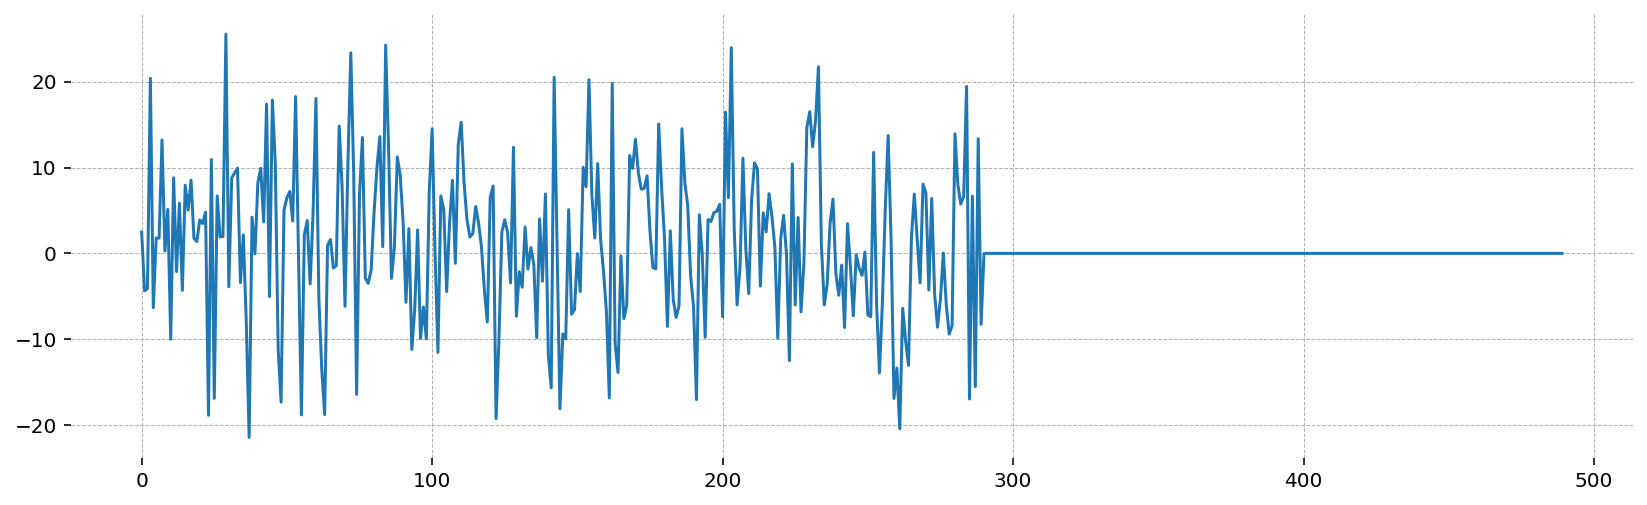

In [249]:
plt.plot(AR)

In [ ]:
X = np.zeros((100, 1))


In [247]:
N = 200
trend = .05
sigma = 4
f_order = 2
season_int = 20

# arr = np.arange(N) * trend \
#         + scipy.stats.norm(0, sigma).rvs(N) \
        # + np.sin( 2 * np.pi * np.arange(N) / season_int * f_order ) 

# arr = arr.reshape((len(arr),1))

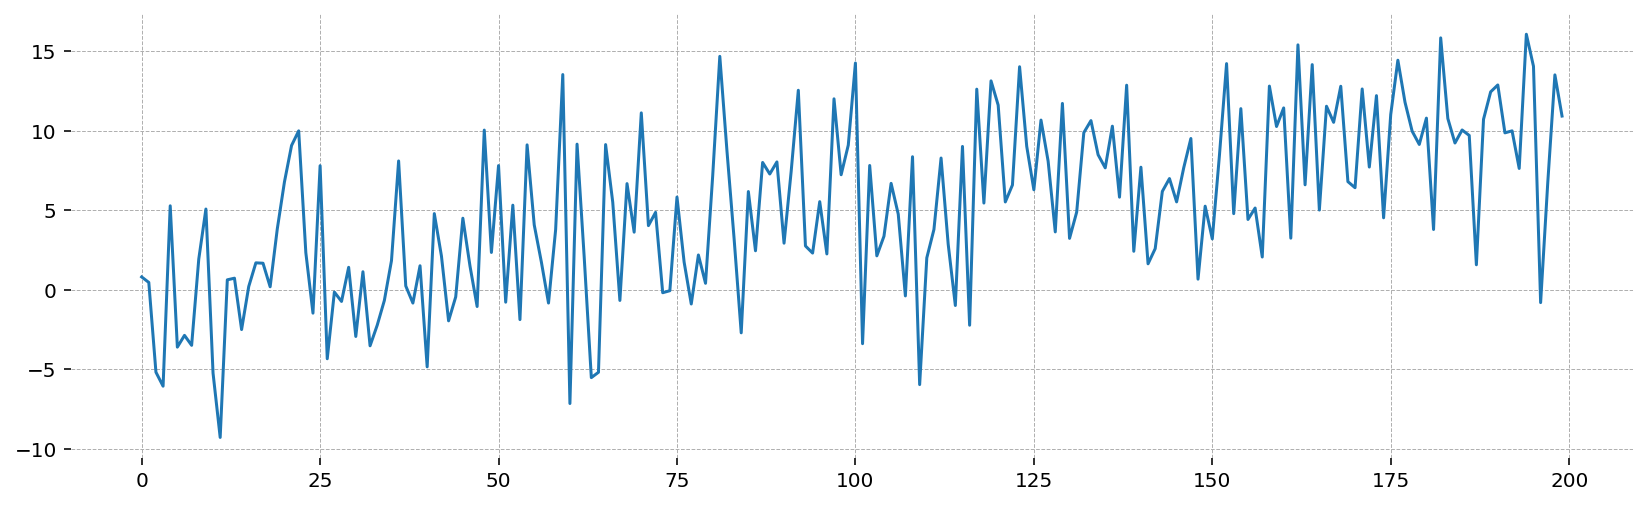

In [233]:
plt.plot(arr)

In [234]:
with pm.Model() as arr_model:
    trend = pm.Normal('trend', 0, 5)
    rw = pm.GaussianRandomWalk('rw', mu=0, sigma=5)
    
    mu = np.arange(len(arr)) * trend + rw
    
    likelihood = pm.Normal('data', mu=mu, observed=arr)
    
    # idata = pm.sample()
    prior_p = pm.sample_prior_predictive()

C:\Users\LukasGrahl\miniforge3\envs\mamba_env_miscell\Lib\site-packages\pymc\distributions\timeseries.py:293: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(


ValueError: Must specify steps or shape parameter

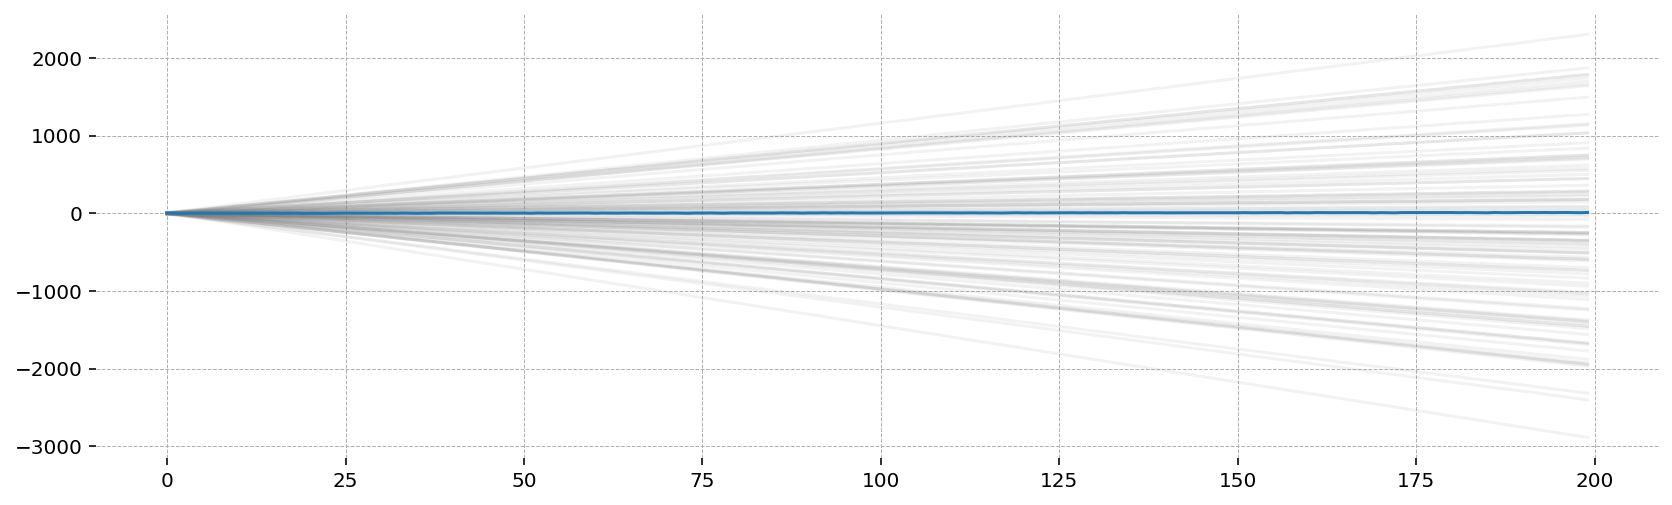

In [218]:
plt.plot(prior_p.prior_predictive.data[0, np.random.randint(0, 500, 100), :].transpose(), alpha=.1, color='grey');
plt.plot(ser)

In [219]:
with arr_model:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [trend, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


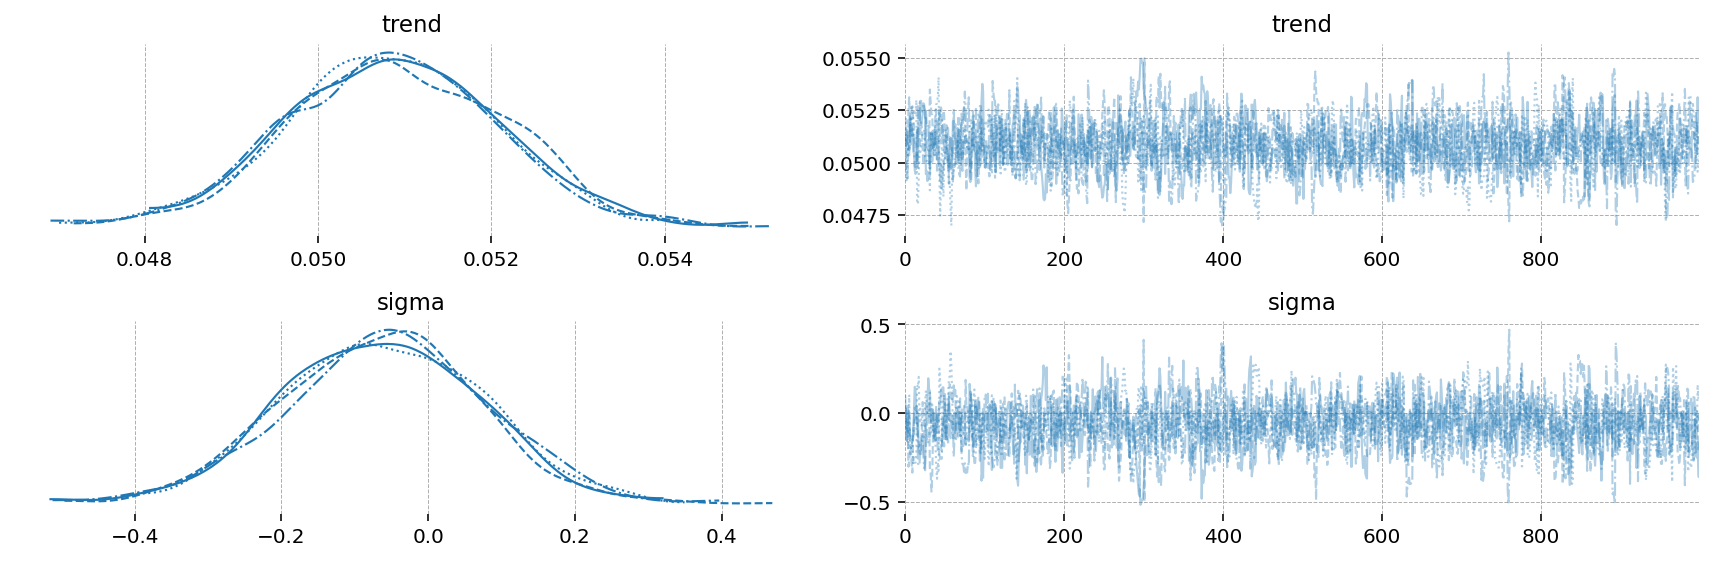

In [220]:
az.plot_trace(idata);
plt.tight_layout()

In [221]:
with arr_model:
    post_p = pm.sample_posterior_predictive(idata)

Sampling: [data]


In [222]:
idata.posterior.trend.mean()

<xarray.DataArray 'trend' ()>
array(0.0508634)

In [226]:
idata.posterior.sigma.mean()

<xarray.DataArray 'sigma' ()>
array(-0.062186)

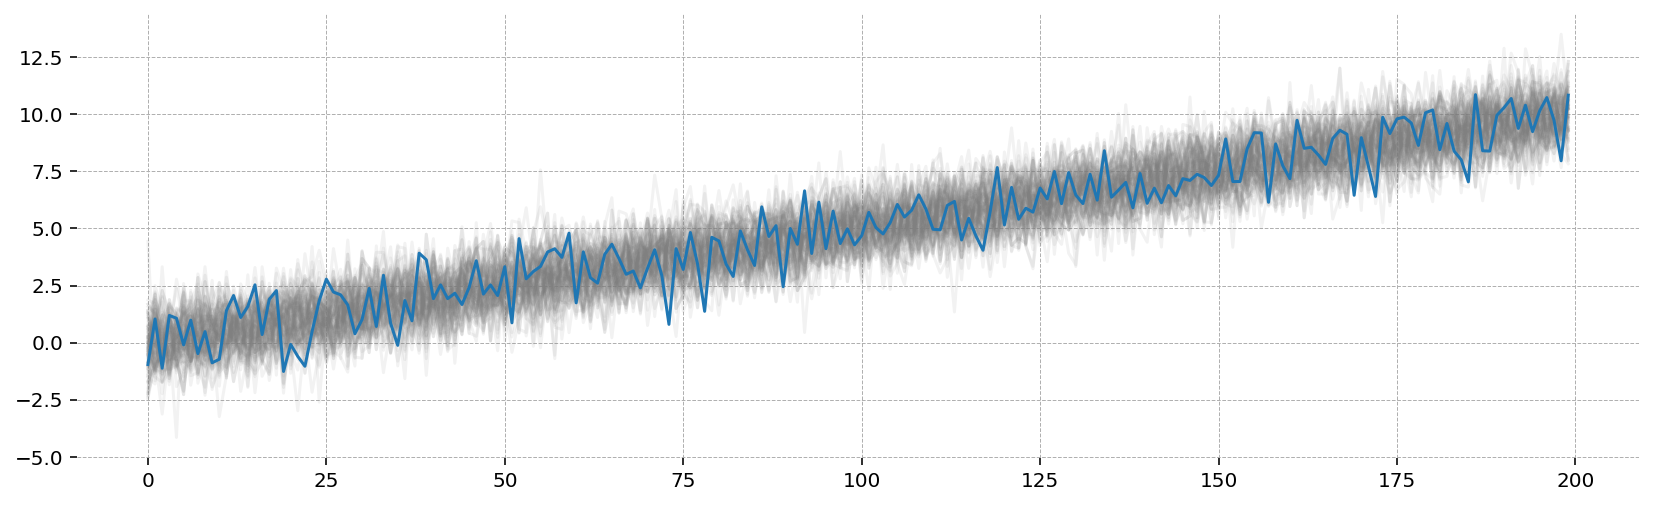

In [228]:
plt.plot(post_p.posterior_predictive.data[0, np.random.randint(0, 500, 100), :].transpose(), alpha=.1, color='grey');
plt.plot(ser)